In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

def csv_to_dataframe(file_path):
    # Load csv file
    df = pd.read_csv(file_path)
    
    return df

# Provide the path to your csv file
file_path = './stats/2022adp.csv'

# Call the function
df_adp = csv_to_dataframe(file_path)
df_adp['Player'] = df_adp['Player'].astype(str)


In [5]:
import pandas as pd

def csv_to_dataframe(file_path):
    # Load csv file
    df = pd.read_csv(file_path)
    
    return df

# Provide the path to your csv file
file_path = './stats/2022results.csv'

# Call the function
df_results = csv_to_dataframe(file_path)
df_results['Player'] = df_results['Player'].astype(str)
df_results = df_results.drop(columns=['Pos'])
print(df_results.head)


FileNotFoundError: [Errno 2] No such file or directory: './2022results.csv'

In [6]:
df = pd.concat([df_adp.set_index('Player'), df_results.set_index('Player')], axis=1, join='inner').reset_index()


print(df.head)

NameError: name 'df_results' is not defined

In [4]:
df_up_one_round = df[(df['ADP Change'] > 0) & (df['ADP Change'] <= 13)]
df_up_one_to_three_rounds = df[(df['ADP Change'] > 12) & (df['ADP Change'] <= 36)]
df_down_one_round = df[(df['ADP Change'] >= -12) & (df['ADP Change'] < 0)]
df_down_one_to_three_rounds = df[(df['ADP Change'] >= -36) & (df['ADP Change'] < -12)]

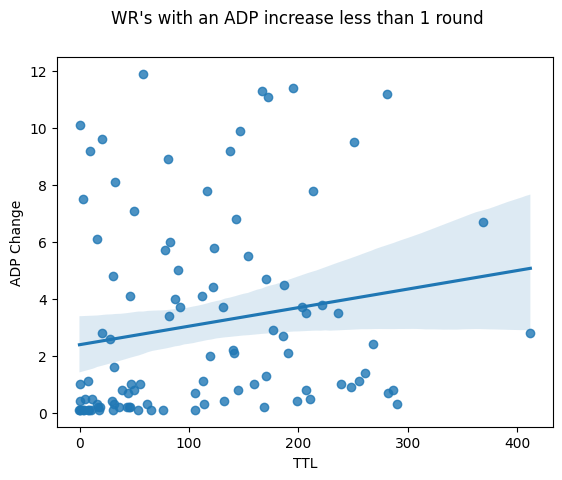

In [5]:
import seaborn as sns 
sns.regplot(x='TTL', y='ADP Change', data=df_up_one_round)
plt.suptitle("WR's with an ADP increase less than 1 round")
plt.show()

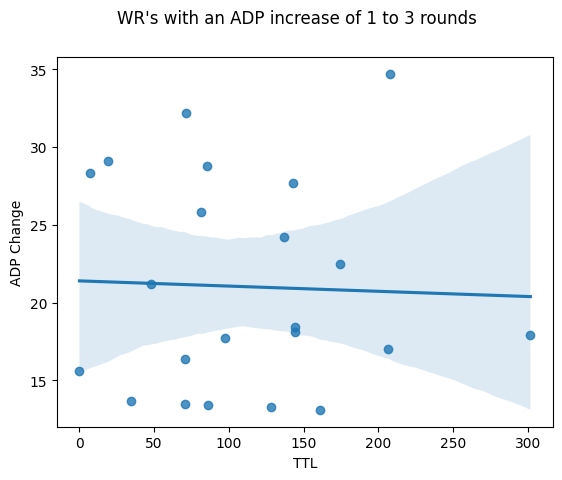

In [6]:
import seaborn as sns 
sns.regplot(x='TTL', y='ADP Change', data=df_up_one_to_three_rounds)
plt.suptitle("WR's with an ADP increase of 1 to 3 rounds")
plt.show()

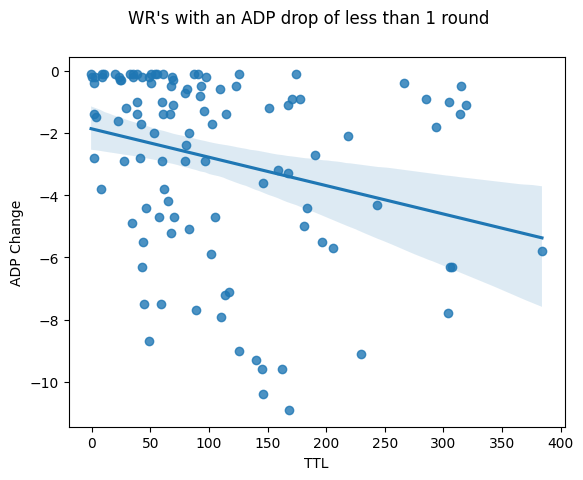

In [7]:
import seaborn as sns 
sns.regplot(x='TTL', y='ADP Change', data=df_down_one_round)
plt.suptitle("WR's with an ADP drop of less than 1 round")
plt.show()


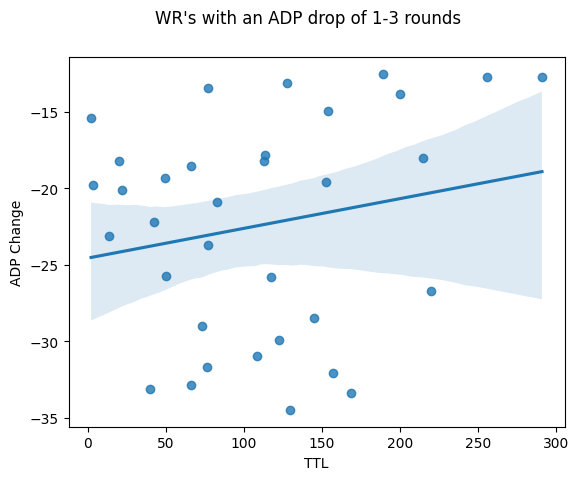

In [8]:
import seaborn as sns 
sns.regplot(x='TTL', y='ADP Change',data=df_down_one_to_three_rounds)
plt.suptitle("WR's with an ADP drop of 1-3 rounds",)
plt.show()

In [9]:
# Spearman correlation
correlation = df_up_one_round['TTL'].corr(df_up_one_round['ADP Change'], method='spearman')
print(f"The Spearman correlation for one round upward ADP movement is {correlation * 100:.2f}%")
# Kendall Tau
correlation = df_up_one_round['TTL'].corr(df_up_one_round['ADP Change'], method='kendall')
print(f"The Kendall correlation for  one round upward ADP movement is {correlation * 100:.2f}%")
correlation = df_up_one_round['TTL'].corr(df_up_one_round['ADP Change'])
print(f"The pandas correlation for  one round upward ADP movement is {correlation * 100:.2f}%")

The Spearman correlation for one round upward ADP movement is 34.60%
The Kendall correlation for  one round upward ADP movement is 22.95%
The pandas correlation for  one round upward ADP movement is 17.88%


In [10]:
# Spearman correlation
correlation = df_up_one_to_three_rounds['TTL'].corr(df_up_one_to_three_rounds['ADP Change'], method='spearman')
print(f"The Spearman correlation for one round upward ADP movement is {correlation * 100:.2f}%")
# Kendall Tau
correlation = df_up_one_to_three_rounds['TTL'].corr(df_up_one_to_three_rounds['ADP Change'], method='kendall')
print(f"The Kendall correlation for  one round upward ADP movement is {correlation * 100:.2f}%")
correlation = df_up_one_to_three_rounds['TTL'].corr(df_up_one_to_three_rounds['ADP Change'])
print(f"The pandas correlation for  one round upward ADP movement is {correlation * 100:.2f}%")



The Spearman correlation for one round upward ADP movement is -1.24%
The Kendall correlation for  one round upward ADP movement is -3.47%
The pandas correlation for  one round upward ADP movement is -3.64%


In [15]:
df_wr = df[df['Pos'] == 'WR'].sort_values(by='Pos Rank', ascending=True)
df_rb = df[df['Pos'] == 'RB'].sort_values(by='Pos Rank', ascending=True)
df_qb = df[df['Pos'] == 'QB'].sort_values(by='Pos Rank', ascending=True)

In [20]:
df_wr.replace('-', np.nan, inplace=True)
df_cleaned = df_wr.dropna(thresh=(df_wr.shape[1] - 5))

print(df_cleaned)

               Player Pos Team  Current ADP  Old ADP  ADP Change  Ovr Rank  \
2    Justin Jefferson  WR  MIN          3.3      4.3        -1.0         3   
3       Ja'Marr Chase  WR  CIN          5.6      5.2         0.4         5   
6        Stefon Diggs  WR  BUF          8.5      8.9        -0.4         8   
8       Davante Adams  WR   LV         10.7     11.6        -0.9        10   
13        CeeDee Lamb  WR  DAL         14.7     13.8         0.9        15   
..                ...  ..  ...          ...      ...         ...       ...   
399     Jaelon Darden  WR   TB        216.0    216.0         0.0       559   
402     Britain Covey  WR  PHI        216.0    216.0         0.0       570   
466  Marquise Goodwin  WR  CHI        216.0    215.9         0.1       711   
512         Dax Milne  WR  WAS        216.0    216.0         0.0      1041   
524    Rashid Shaheed  WR   NO        216.0    216.0         0.0      1123   

     Pos Rank    # Team  ...    11    12    13    14    15    1